<a href="https://colab.research.google.com/github/KezhenLi/Homework4/blob/main/homework4.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#(a)
from numpy import exp,ones,copy,cos,tan,pi,linspace,sqrt
from pylab import plot, show, xlabel, ylabel

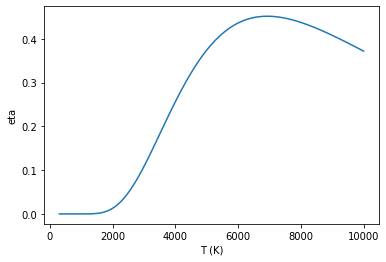

In [36]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Constants
hc = 1.23984193 * 10 ** 3
w1 = 390  # wavelength 
w2 = 750  # wavelength 
k = 8.6173303 * 10 ** -5
lower_constant = hc / (w2 * k)
upper_constant = hc / (w1 * k)
accuracy = 1  

def eta(T):
    def f(x):
        return x ** 3 / (exp(x) - 1)
    N = 100
    x, w = gaussxwab(N, lower_constant / T, upper_constant / T)
    integral = 0.0
    for k in range(N):
        integral += w[k] * f(x[k])
    return 15 / pi ** 4 * integral

# Make plot of eta from T = 300 K to 10000 K
T = linspace(300, 10000, 100)
plot(T, etas)
xlabel('T (K)')
ylabel(('eta'))
show()

# Considering the melting point of tungsten is 3695 K, you can't run a tungsten-filament light bulb at this temp


In [24]:
#(b)
from numpy import exp,ones,copy,cos,tan,pi,linspace,sqrt
from pylab import plot, show, xlabel, ylabel

In [39]:
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Constants
hc = 1.988 * 10 ** -26
w1 = 390  # wavelength 
w2 = 750  # wavelength 
k = 1.381 * 10 ** -23  
lower_constant = hc / (w2 * k)
upper_constant = hc / (w1 * k)
accuracy = 1  

def eta(T):
    def f(x):
        return x ** 3 / (exp(x) - 1)
    N = 100
    x, w = gaussxwab(N, lower_constant / T, upper_constant / T)
    integral = 0.0
    for k in range(N):
        integral += w[k] * f(x[k])
    return 15 / pi ** 4 * integral

# From (a) plot, max efficiency is in (6000,8000)
# Initial values
T1 = 6000
T4 = 8000
T2 = T4 - (T4 - T1) / 1.618 #golden ratio
T3 = T4 + (T4 - T1) / 1.618
eta1 = eta(T1)
eta2 = eta(T2)
eta3 = eta(T3)
eta4 = eta(T4)

while T4 - T1 > accuracy:
    if eta2 < eta3 :
        T4, eta4 = T3, eta3
        T3, eta3 = T2, eta2
        T2 = T4 - (T4 - T1) / 1.618
        eta2 = eta(T2)
    else:
        T1, eta1 = T2, eta2
        T2, eta2 = T3, eta3
        T3 = T1 + (T4 - T1) / 1.618
        eta3 = eta(T3)
print(0.5 * (T1 + T4))


7235.951064815758


In [40]:
#(c) The operating temperature of a tungsten filament in an incandescent light bulb is 2450 K, and its emissivity is 0.350.
# it's not practial to run a tungsten filament light bulb at 7236K